# Lesson 5

We will be turning our attention to regression models. While classification models predict discrete outcomes, regression models deal with predictions of continuous outcomes.

**Goal**

After this lesson, you should:
1. Understand the linear regression model and be able to implement it using sklearn.
2. Understand common loss functions (also known as cost functions)
3. Understand how we use regularization to prevent overfitting.


In [1]:
import numpy as np
import pandas as pd
import sklearn as skl
import statsmodels as sm
import matplotlib.pyplot as plt
import seaborn as sea

# control the plotsize
plt.rcParams['figure.figsize'] = [10,5]

In [2]:
# the dataset we will be using today comes with sklearn
from sklearn.datasets import load_boston #boston housing prices

### Linear Regression

Until this point, we've dealt with models that help us _classify_ discrete entities. However, we often want to predict a continuous quantity. A common use case may be housing prices. Regression can help us answer the question:

> How much should I pay for that house?

You can reduce the problem to one of classification (e.g. what pricing bucket does this house fall into?), but we often want a more precise answer.

**Linear Regression** is a method which allows us to discover a relationship between two continuous variables. It is called _linear_ because it is _linear in it's parameters_. Note, this does not mean that the relationship between the two variables must be linear.

$$
\begin{align}
f(X) &= AX \\
     &= \alpha_0 + \alpha_1x_1 + \alpha_2x_1^2 + ...
\end{align}
$$

Notice that the above equation is still linear in its parameters, but it describes a quadratic function.

In [3]:
import random
xs = [random.uniform(4,10) for x in range(1,100)]
ys = [x + random.uniform(-3,10) for x in xs]

Let's consider two continuous variables which are related ($x$ and $y$). We want to discover some function $h(x) = \theta_0 + \theta_1x$ such that $h(x)$ describes the relationship between $x$ and $y$.

Given this data, there are an _infinite_ number of possible functions which can potentially describe this relationship. Thus, we naturally ask ourselves, "which function _best_ describes the relationship between $y$ and $x$?"

Let's consider three possible functions which may describe the relationship above:

$$
h_\text{red}, h_\text{yellow}, h_\text{green}
$$

We can visualize these functions below:

Text(0.5,1,'Reltionship between x and y')

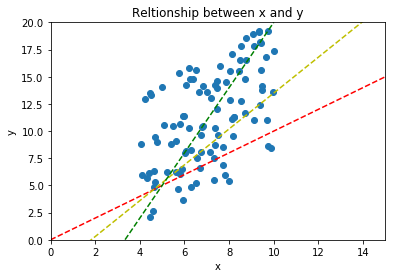

In [4]:
plt.scatter(xs,ys)
plt.ylim((0,20))
plt.xlim((0,15))

plt.plot([0,20],[0,20],'r--')
plt.plot([0,20],[-3,30], 'y--')
plt.plot([0,10],[-10,20],'g--')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Reltionship between x and y")

### Loss Function (or Cost Function)
Just like we declared a cost function on our classification trees (which measured the error once we divided samples), we can consider a cost function on our regression.

In other words, _for every possible $\theta_0$ and $\theta_1$ that we can try in our $h$ function above, only one pair can be the best_.

Let's consider a very common cost function known as the Mean Square Error function:

$$
    L(\theta_0,\theta_1) = \frac{1}{n}\sum_{i=1}^{n}\big(h(x_i) - y_i\big)^2
$$

We've seen this function before, and it should be pretty familiar to everyone. It basically says, "let's approximate our error by summing each individual error".

Thus, we may now phrase our problem as an optimization problem where we attempt to _minimize_ the cost function.

We can imagine that the cost function associated with the above plot may look something like this:

<img src="https://mathinsight.org/media/applet/image/large/local_minimum_two_variables.png" width="300">

Where do you think the cost function is minimized?

### Gradient Descent

A common algorithm which help us minimze the loss function is called **gradient descent**. This algorithm is intuitively understood as follows:

> Image you are somewhere on the top of a dangerously steep hill, and it is very foggy. You can only see 1-2 meters in any direction, but you want to safely and quickly descend the mountain. To begin, you decide to look around and see where the mountain slopes downwards. Upon finding the steepest downward sloping point, you take one step in that direction. You then stop and repeat the process of looking around for another downard sloping point (since you have a slightly different 1-2 meter view).

This turns out to be a suprising powerful algorithm which pops up in a number of places.

In [142]:
## Let's explore housing prices
b_data = load_boston()

raw = pd.DataFrame(b_data.data,columns=b_data.feature_names)
raw['target'] = b_data.target

raw.columns = raw.columns.map(lambda x: x.lower())

print(b_data.DESCR)
raw.head()

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Text(0,0.5,'average rooms per dwelling')

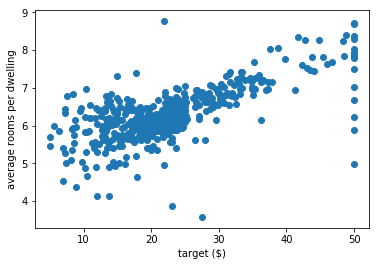

In [159]:
plt.scatter(raw['target'],raw['rm'])
plt.xlabel("target ($)")
plt.ylabel("average rooms per dwelling")

In [206]:
from sklearn.cross_validation import train_test_split

X = raw['rm']
y = raw['target']

X_train, X_test, y_train, y_test = train_test_split(X,y)

h = LinearRegression()
h.fit(X_train.values.reshape(-1,1),y_train)

pred = h.predict(X_test.values.reshape(-1,1))

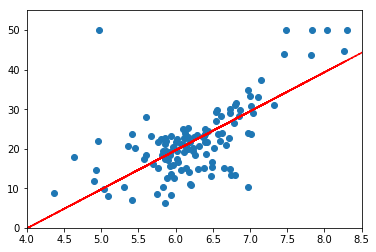

In [210]:
plt.scatter(X_test,y_test)
plt.xlim((4,8.5))
plt.ylim((0,55))

plt.plot(X_test,pred,'r--')

### Regularization

We've discussed overfitting, underfitting, bias, and variance and what they mean for our models. Remember, that highly biased models display underfitting, while high variance models display overfitting.

<img src="https://kevinbinz.files.wordpress.com/2014/08/partitions-underfitting-vs-overfitting-regression-via-polynomial-degree.png">

**Regularization** is a technique which allows us to reduce the variance of our model, and thereby reduce the overfitting displayed by our model.

Consider the case where we have a significant number of features. We quickly realize that approach the problem geometrically (i.e. looking at lines and curves on our data) is neither scalable nor tractable for these higher dimensional cases.

We have two primary options to reduce overfitting:

1. reduce the number of features used by either manually selecting features or using a model selecting algorithm

2. use regularization, which keeps our desired features by reduced the values of the parameters. This allows us to keep many features, each of which slightly contributes to our predictor.

Intuitively, regularization adds large parameter penalities to our cost function so that we may minimize their contributions:

$$
    \min_{\theta} L(\theta) = \frac{1}{n}\sum_{i=1}^{n}\big(h(x_i) - y_i\big)^2 + \lambda \sum_{i=1}^{n} \theta_j^2
$$

This new cost function allows us to penalize all of our parameters.

### Homework

We will explore regularization in our models next week. Please read the following to prepare for class on Thursday. Part of your homework will be to describe the following image of L1/L2 regularization (aka. lasso and ridge regression)

https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a

<img src="https://qph.fs.quoracdn.net/main-qimg-1d86ff73fc5bb80c32ee5211e98c8610-c">